In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_all = "Output/2019_2020_mixed_beverage"

df_all = pd.read_csv(data_all, encoding="utf-8")

In [3]:
file_path = "Output/census_data.csv"

df_all2 = pd.read_csv(file_path, encoding="utf-8")

In [19]:
#efficient way to extract year from string format date
df_all['year'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).year
df_all['month'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).month
df_all["taxnumber_locationname"]=df_all.taxpayer_number.astype(str)+"_"+df_all.location_name
df_all.head()

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month,taxnumber_locationname
0,32068897456,"HC&K, LLC",7035 W GRAND PKWY S STE 10,RICHMOND,TX,77407.0,79,1,TOP SUSHI,7035 W GRAND PKWY S STE 10,...,2019-01-31T00:00:00.000,0,0,0,0,0,NaN,2019,1,32068897456_TOP SUSHI
1,32051593963,J & J ACKERMAN CORP.,PO BOX 939,GRANGER,TX,76530.0,246,3,COTTON COUNTRY CLUB,212 E DAVILLA ST,...,2019-01-31T00:00:00.000,0,0,0,0,0,NaN,2019,1,32051593963_COTTON COUNTRY CLUB
2,32046106475,FJ RESTAURANT INC,9300 S INTERSTATE 35 STE 8500 # 431,AUSTIN,TX,78748.0,227,2,TAQUERIA MEXICANO GRILLE,10207 CHINA SPRING RD STE 140,...,2019-01-31T00:00:00.000,10013,0,8648,0,18661,NaN,2019,1,32046106475_TAQUERIA MEXICANO GRILLE
3,32054228120,S & KW CORPORATION,6617 CHIMNEY ROCK RD,HOUSTON,TX,77081.0,101,1,NAZARETH CAFE,6617 CHIMNEY ROCK RD,...,2019-01-31T00:00:00.000,3212,0,2509,0,5721,NaN,2019,1,32054228120_NAZARETH CAFE
4,32000861685,"FOUNTAIN FOODS, INC.",25600 WESTHEIMER PKWY STE 110,KATY,TX,77494.0,79,2,HARVEST ORGANIC GRILLE,1810 FOUNTAIN VIEW DR,...,2019-01-31T00:00:00.000,0,0,0,0,0,2019-06-01T00:00:00.000,2019,1,32000861685_HARVEST ORGANIC GRILLE


In [20]:
# df_all.info()
df_all.inside_outside_city_limits_code_y_n.head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: inside_outside_city_limits_code_y_n, dtype: object

In [22]:
unique_locations=df_all.loc[:,['taxnumber_locationname','obligation_end_date_yyyymmdd','year','month']].drop_duplicates().reset_index(drop=True)
locations_by_month=pd.DataFrame(unique_locations.groupby(['year','month',"obligation_end_date_yyyymmdd"]).size(),columns=["Location Count"])
locations_by_month

Location Count
year month obligation_end_date_yyyymmdd                
2019 1     2019-01-31T00:00:00.000                 4452
     2     2019-02-28T00:00:00.000                 4526
     3     2019-03-31T00:00:00.000                 4440
     4     2019-04-30T00:00:00.000                 4335
     5     2019-05-31T00:00:00.000                 4425
     6     2019-06-30T00:00:00.000                 4355
     7     2019-07-31T00:00:00.000                 4354
     8     2019-08-31T00:00:00.000                 4583
     9     2019-09-30T00:00:00.000                 4390
     10    2019-10-31T00:00:00.000                 4622
     11    2019-11-30T00:00:00.000                 4433
     12    2019-12-31T00:00:00.000                 4315
2020 1     2020-01-31T00:00:00.000                 4155
     2     2020-02-29T00:00:00.000                 4448
     3     2020-03-31T00:00:00.000                 4121
     4     2020-04-30T00:00:00.000                 4269
     5     2020-05-31T00:00:00.000                 4361
     6     2020-06-30T00:00:00.000                 4338
     7     2020-07-31T00:00:00.000                 4356
     8     2020-08-31T00:00:00.000                 4366
     9     2020-09-30T00:00:00.000                 4744
     10    2020-10-31T00:00:00.000                 4294
     11    2020-11-30T00:00:00.000                 4239
     12    2020-12-31T00:00:00.000                 4303

In [23]:
inner_annual=df_all.loc[df_all['inside_outside_city_limits_code_y_n']=="Y"].groupby('year').total_receipts.sum().reset_index()
inner_annual

,year,total_receipts
0,2019,2354531473
1,2020,1366209021


In [24]:
outer_annual=df_all.loc[df_all['inside_outside_city_limits_code_y_n']=="N"].groupby('year').total_receipts.sum().reset_index()
outer_annual

,year,total_receipts
0,2019,124945687
1,2020,81085810


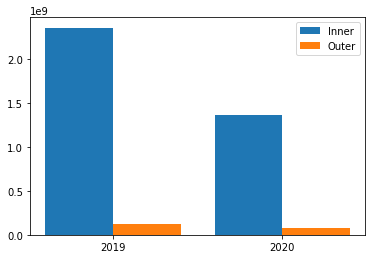

In [25]:
X = ['2019','2020']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, inner_annual['total_receipts'], 0.4, label = 'Inner')
plt.bar(X_axis + 0.2, outer_annual['total_receipts'], 0.4, label = 'Outer')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()